In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [5]:
%matplotlib inline
import numpy as np

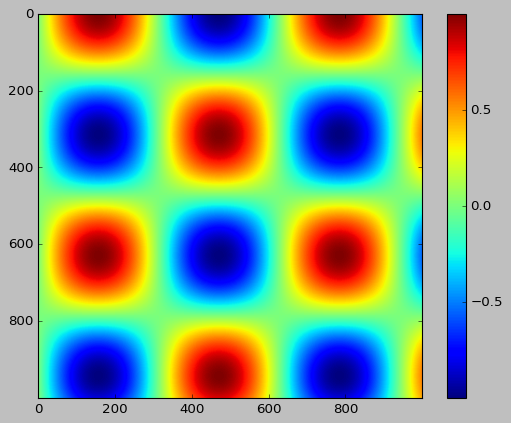

In [15]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Индивидуализация цветовых панелей

Цветовая карта может быть указана с помощью аргумента `cmap`:

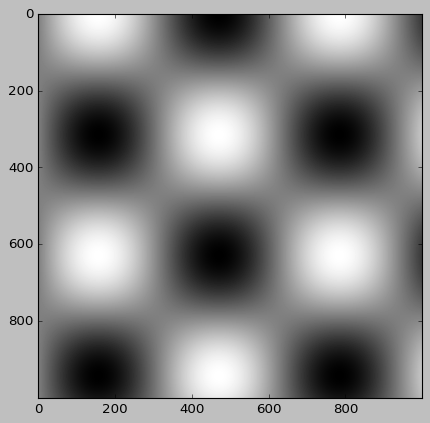

In [7]:
plt.imshow(I, cmap='gray');

### Выбирая цветовую панель

Вы должны знать о существовании трёх различных категорий цветовых панелей:

* _Последовательные цветовые схемы (Sequential colormaps)_ - этот тип представляет собой одну непрерывную последовательность цветов (например, `binary` или `viridis`).
* _Расходящиеся цветовые схемы (Divergent colormaps)_ - эти схемы обычно состоят из двух отдельных цветов, которые отображают положительные или отрицательные отклонения от средней (например `RdBu` или `PuOr`).
* _Качественные цветовые схемы (Qualitative colormaps)_ - эти сочетают цвета без какой-либо последовательности (например `rainbow` или `jet`).

In [8]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

/tmp/ipykernel_349005/144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_349005/144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


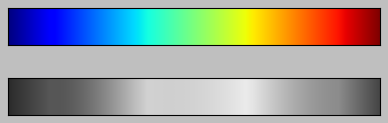

In [9]:
view_colormap('jet')

/tmp/ipykernel_349005/144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_349005/144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


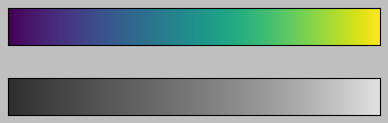

In [10]:
view_colormap('viridis')

/tmp/ipykernel_349005/144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_349005/144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


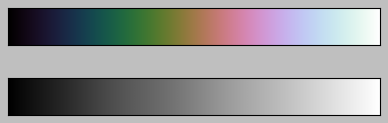

In [11]:
view_colormap('cubehelix')

/tmp/ipykernel_349005/144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_349005/144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


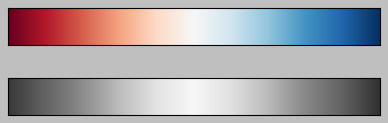

In [12]:
view_colormap('RdBu')

### Ограничения цветов и расширения

Цветовая панель является экземпляром `plt.Axes`, так что все трюки с форматированием осей и меток (tick) применимы здесь. Цветорая панель обладает интересной гибкостью: например мы можем установить ограничения на цвета для индикации значений выходящих за определенные пределы с помощью треугольной стрелки сверху и снизу цветовой панели, это достигается с помощью свойства `extend`. Это может быть полезным для отображения изображения, на котором присутствует шум:

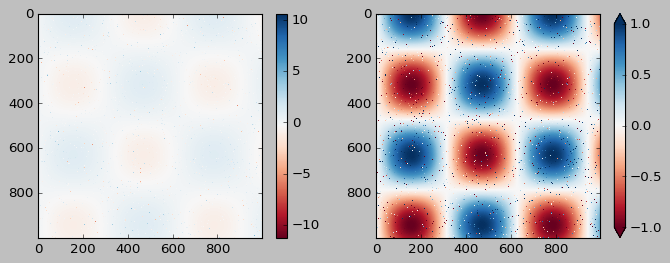

In [13]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Обратите внимание, что на левой панели, цвет по умолчанию реагирует на пиксели с шумом и, диапазон с шумом, полностью размывает основное изображение. На правой панели мы вручную установили границы для цветов и добавили расширение для обозначения значений больше или меньше границ шума.

### Дискретные цветовые панели

По умолчанию цветовые панели непрерывны, но иногда требуется отобразить дискретные значения. Простейший способ сделать это - использовать функцию `plt.cm.get_cmap()` и передать ей имя подходящей карты цветов вместе с количеством необходимых корзин:

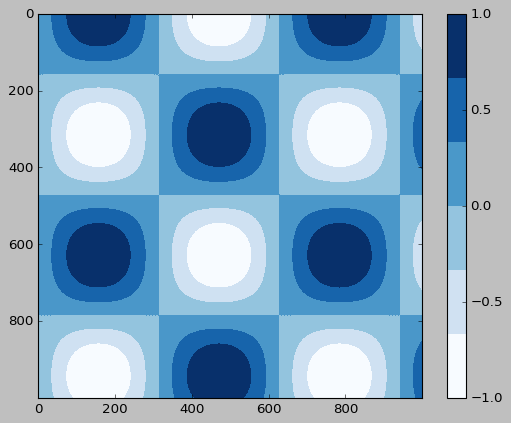

In [33]:
plt.imshow(I, cmap=plt.get_cmap(name='Blues', lut=6))
plt.colorbar()
plt.clim(-1,1)

## Пример: рукописные цифры

В Scikit-learn есть набор из около 2000 8х8 образцов рукописных символов. Давайте загрузим его для начала:

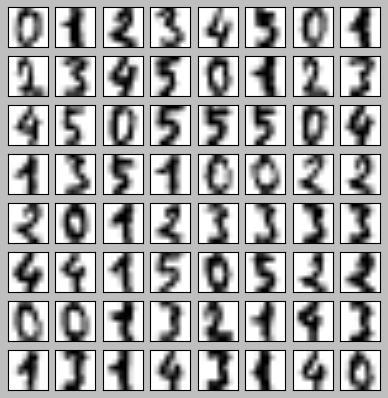

In [28]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Так как каждая цифра определена оттенком каждого из 64 пикселей, мы можем представить каждую цифру как точку в 64-мерном пространстве: каждое измерение представляет яркость одного пикселя. Визуализация отношений в настолько высоко-размерных данных бывает очень трудной задачей. Одним из путей является использование техники _сокращения размерности_, такую как manifold learning для снижения размерности данных при сохранении интересующих взаимоотношений. Сокращение размерности является примером неконтролируемого машинного обучения и будет обсуждаться в разделе [What Is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html).

Давайте посмотрим на двумерную manifold learning проекцию этих данных:

In [34]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/home/mojo/.pyenv/versions/ds/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/mojo/.pyenv/versions/ds/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Мы будем использовать дискретную цветовую панель для представления результатов, установки `ticks` и `clim` для улучшения восприятия результирующей цветовой карты:

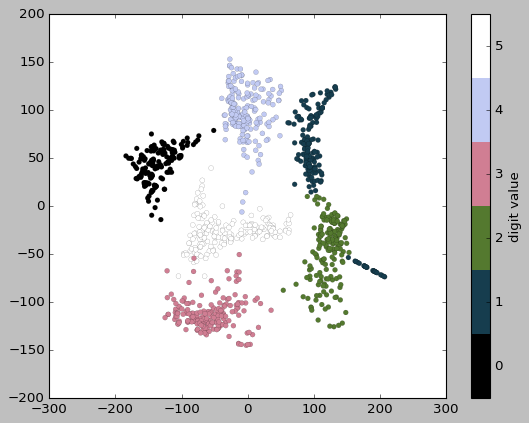

In [36]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap(name='cubehelix', lut=6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

Эта проекция даёт нам некоторые интересные знания о взаимоотношениях между данными: например, диапазоны 5 и 3 частично пересекаются, что говорит нам о том, что рукописные пятерки и тройки может быть трудноотличимы и, поэтому, могут привести к затруднениям для алгоритмов автоматической классификации. Другие значения, например 0 и 1, находятся далеко друг от друга и, скорее всего, не представят трудностей для автоматической классификации. Т.е. можно скзать, что 5 и 3 выглядят более похоже между собой чем 0 и 1.